 <h1 align="center" style="color:#4ca8ed">
    Обробка та аналіз БМД.<br>
    Группа: БС-81<br>
    Мумінов А.O.<br>
    Практикум Номер 8
</h1>

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [3]:
#Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані повинні відповідати вимогам 

In [8]:
data = pd.read_excel("SHO.xlsx",encoding = 'utf-8')
data['Фізика'] = data['Фізика']/2-5
data.columns = ['HalfMaraphon', 'Maraphon']

data.to_csv("RunningPBTime(minutes).csv")
data = pd.read_csv("RunningPBTime(minutes).csv")
data

,Unnamed: 0,HalfMaraphon,Maraphon
0,0,91.5,186
1,1,89.5,192
2,2,83.5,173
3,3,86.5,184
4,4,86.0,173
5,5,79.5,181
6,6,74.0,177
7,7,84.0,198
8,8,80.5,171
9,9,72.5,162


In [9]:
#Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [10]:
data_ch = pd.DataFrame({},index=["середні","стандартні відхилення"])
for i in range(len(data.columns)):
    data_ch["Група-" +str(i+1)] = [np.mean(data.iloc[:,i]),np.std(data.iloc[:,i])]
    
data_ch 

,Група-1,Група-2,Група-3
середні,11.500000,78.645833,179.750000
стандартні відхилення,6.922187,6.627718,9.143531


In [11]:
#Побудувати графік розкиду в групах.

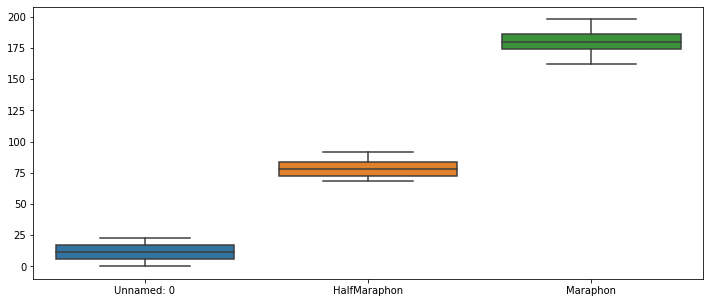

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(data = data)

In [ ]:
#Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз. 

In [5]:
def anova(data):
    size = len(data.columns)
    
    table = pd.DataFrame({})
    for i in range(size):
        table["Група-" +str(i+1)] = []
    table["Загальне значення"] = []
    
    table.loc["Tc (сума значень)"] = [sum(data.iloc[:,i]) for i in range(size)] + [0] 
    table.iloc[0,size] = sum(table.iloc[0,:])
    
    table.loc["(Tc)^2 (сума квадратів значень)"] = [table.iloc[0,i]**2 for i in range(size)] + [0] 
    table.iloc[1,size] = sum(table.iloc[1,:])
    
    table.loc["c (кількість умов)"] = [""]*(size+1)
    table.iloc[2,size] = size
    
    table.loc["n (кількість досліджень)"] = [len(data)]*size + [len(data)*size]
    
    table.loc["(Σx)^2 (квадрат суми)"] = [""]*size + [table.iloc[0,size]**2]
    
    table.loc["(Σx)^2/N (Константа)"] = [""]*size + [table.iloc[4,size]/table.iloc[3,size]]
    
    table.loc["Σ(x^2) (Сума квадратів)"] = [sum(data.iloc[:,i]**2) for i in range(size)] + [0]
    table.iloc[6,size] = sum(table.iloc[6,:])
    
    table.loc["(1). SSфакт (Внутр. дисперсія)"] = [""]*size + [table.iloc[1,size]/len(data) - table.iloc[5,size]]
    table.loc["(2). SSзаг  (Загал. дисперсія)"] = [""]*size + [table.iloc[6,size] - table.iloc[5,size]]
    table.loc["(3). SSвип  (випадк. величина)"] = [""]*size + [table.iloc[8,size] - table.iloc[7,size]]
    
    table.loc["(4). d факт (Ступені свободи)"] = [""]*size + [table.iloc[2,size]-1]
    table.loc["(4). d  заг (Ступені свободи)"] = [""]*size + [table.iloc[3,size]-1]
    table.loc["(4). d  вип (Ступені свободи)"] = [""]*size + [table.iloc[11,size]-table.iloc[10,size]]
    
    table.loc["(5). MS факт"] = [""]*size + [table.iloc[7,size]/table.iloc[10,size]]
    table.loc["(5). MS вип "] = [""]*size + [table.iloc[9,size]/table.iloc[12,size]]
    
    table.loc["(6). F емпіричне "] = [""]*size + [table.iloc[13,size]/table.iloc[14,size]]
    
    table.loc["(7). F критичне ("+str(table.iloc[10,size])+","+str(table.iloc[12,size])+")"] = [""]*size + [0]
    table.loc["(8). результат "] = [""]*size + [table.iloc[13,size]/table.iloc[14,size]]
    
    
    table_values = pd.read_excel("resources/fish.xlsx",encoding = 'utf-8')    #Таблица критичних значеннь
    
    if(table.iloc[12,size] < 126):
        ind1 = abs(pd.read_excel("resources/fish.xlsx",encoding = 'utf-8').iloc[1:31,0]-table.iloc[12,size])
        ind1 = (ind1.index[ind1 == min(ind1)]).values[0]
    else:
        ind1 = 31
        

    if(table.iloc[10,size] < 36):
        ind2 = abs(pd.read_excel("resources/fish.xlsx",encoding = 'utf-8').iloc[0,1:14]-table.iloc[10,size])
        ind2 = (ind2.index[ind2 == min(ind2)]).values[0]
    else:
        ind2 = "Unnamed: 14"

    table.iloc[16,size] = table_values.loc[ind1,ind2];
    table.iloc[17,size] ="not significant" if(table.iloc[15,size] > table.iloc[16,size]) else "significant"
    
    significant = table.iloc[17,size]
    return significant,table
    

In [ ]:
#Вивести результати розрахунку кожного з етапів у вигляді таблиці. 

In [6]:
result,characteristic = anova(data)
characteristic

,Група-1,Група-2,Загальне значення
Tc (сума значень),4015,4314,8329
(Tc)^2 (сума квадратів значень),1.61202e+07,1.86106e+07,3.47308e+07
c (кількість умов),,,2
n (кількість досліджень),24,24,48
(Σx)^2 (квадрат суми),,,6.93722e+07
(Σx)^2/N (Константа),,,1.44526e+06
Σ(x^2) (Сума квадратів),675893,777448,1453341
(1). SSфакт (Внутр. дисперсія),,,1862.52
(2). SSзаг (Загал. дисперсія),,,8085.98
(3). SSвип (випадк. величина),,,6223.46


In [ ]:
#Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок. 

In [7]:
if(result == "significant"):
    print("Приймається нульова гіпотеза - про рівність середніх незалежних груп"
else:
    "Приймається альтернативна гіпотеза - про не рівність середніх незалежних груп")

Приймається альтернативна гіпотеза - про не рівність середніх незалежних груп
